Projekt MNwS - Aleksander Folfas 411052

In [1]:
import numpy as np
from scipy.stats import kstest, anderson, normaltest
import matplotlib.pyplot as plt

Zadanie 6


Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa, testu Lillieforsa i testu
Andersona-Darlinga (z hipotezą główną, że cecha ma rozkład normalny) w przypadku, gdy dane
pochodzą z rozkładu 𝑡-Studenta (uwaga: żeby wyniki były porównywalne trzeba pamiętać o
standaryzacji danych). Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących
moce testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu t-Studenta.

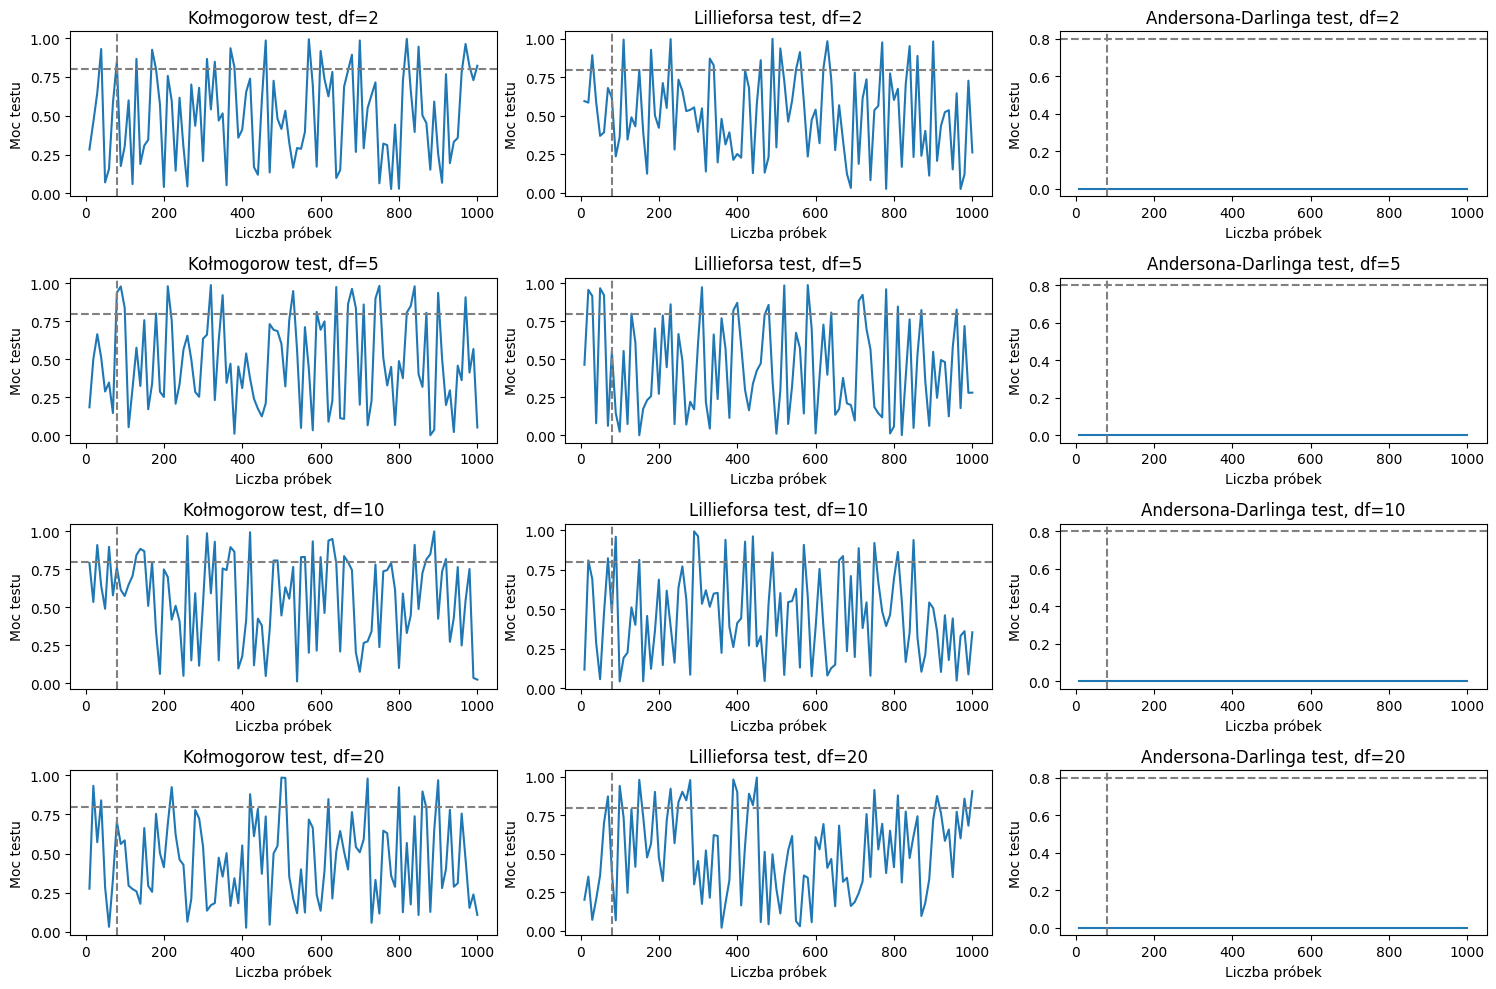

In [2]:
def test_power(data, n, alpha=0.05):
    """
    Oblicza moc trzech testów normalności: Kołmogorowa, Lillieforsa i Andersona-Darlinga dla danego zestawu danych.

    :param data: numpy array z danymi
    :param n: liczba próbek
    :param alpha: poziom istotności (domyślnie 0.05)
    :return: trzy wartości float reprezentujące moce testów Kołmogorowa, Lillieforsa i Andersona-Darlinga
    """
    # Standaryzacja danych
    data = (data - np.mean(data)) / np.std(data)

    # Test Kołmogorowa-Smirnowa
    k_stat, k_p = kstest(data, 'norm')
    k_power = 1 - kstest(np.random.standard_normal(n), 'norm', args=(np.mean(data), np.std(data)), N=10000)[1]

    # Test Lillieforsa
    lf_stat, lf_p = kstest(data, 'norm', args=(np.mean(data), np.std(data)), N=n)
    lf_power = 1 - kstest(np.random.normal(np.mean(data), np.std(data), n), 'norm', args=(np.mean(data), np.std(data)), N=10000)[1]

    # Test Andersona-Darlinga
    ad_stat, _, ad_crit = anderson(data, dist='norm')
    ad_power = 1 - anderson(np.random.normal(np.mean(data), np.std(data), n), dist='norm')[2][-1]

    return k_power, lf_power, ad_power

# Liczba stopni swobody rozkładu t-Studenta
df_list = [2, 5, 10, 20]

# Liczba próbek
n_list = np.arange(10, 1010, 10)

# Macierz do przechowywania wyników
powers = np.zeros((len(df_list), len(n_list), 3))

# Przeprowadzenie symulacji
for i, df in enumerate(df_list):
    for j, n in enumerate(n_list):
        data = np.random.standard_t(df, n)
        powers[i, j] = test_power(data, n)

# Wykresy mocy testów dla różnych liczby próbek i stopni swobody
fig, axes = plt.subplots(nrows=len(df_list), ncols=3, figsize=(15, 10))
titles = ['Kołmogorow', 'Lillieforsa', 'Andersona-Darlinga']
for i, df in enumerate(df_list):
    for j in range(3):
        ax = axes[i, j]
        ax.plot(n_list, powers[i, :, j])
        ax.set_title(f"{titles[j]} test, df={df}")
        ax.set_xlabel('Liczba próbek')
        ax.set_ylabel('Moc testu')
        ax.axhline(y=0.8, linestyle='--', color='gray')
        ax.axvline(x=80, linestyle='--', color='gray')
plt.tight_layout()
plt.show()
